Generate a tile map to visualize border tiles

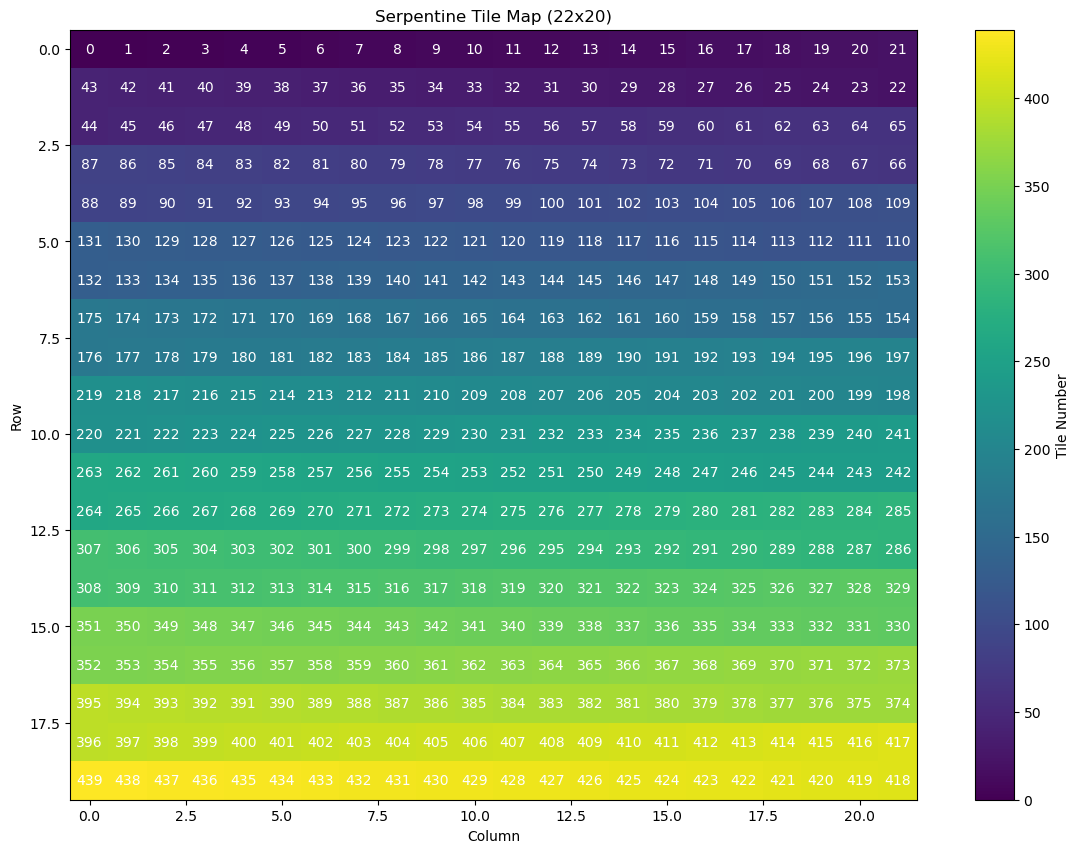

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# here i figured that the image aqusition was done in a serpentine manner, so i created a function to generate it

def generate_tile_map(rows=20, cols=22):
    tile_map = np.zeros((rows, cols), dtype=int)
    tile_number = 0
    for row in range(rows):
        if row % 2 == 0:
            # Left to Right for odd rows
            for col in range(cols):
                tile_map[row, col] = tile_number
                tile_number += 1
        else:
            # Right to Left for even rows
            for col in reversed(range(cols)):
                tile_map[row, col] = tile_number
                tile_number += 1
    return tile_map

# Generate the tile map
tile_map = generate_tile_map()

# Display the tile map as a heatmap for better visualization
plt.figure(figsize=(15, 10))
plt.imshow(tile_map, cmap="viridis")
for (i, j), val in np.ndenumerate(tile_map):
    plt.text(j, i, f"{val}", ha='center', va='center', color='white')
plt.title("Serpentine Tile Map (22x20)")
plt.colorbar(label="Tile Number")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

# Convert to DataFrame for clearer representation
tile_map_df = pd.DataFrame(tile_map)




Identify border tiles

In [6]:
def identify_border_tiles(tile_map):
    rows, cols = tile_map.shape
    border_tiles = []

    # Top row
    border_tiles.extend(tile_map[0, :].tolist())

    # Bottom row
    border_tiles.extend(tile_map[-1, :].tolist())

    # Left column (excluding corners already added)
    border_tiles.extend(tile_map[1:-1, 0].tolist())

    # Right column (excluding corners already added)
    border_tiles.extend(tile_map[1:-1, -1].tolist())

    return sorted(border_tiles)

# Identify border tiles
border_tiles = identify_border_tiles(tile_map)
border_tiles = [f"{tile:03d}" for tile in border_tiles] #change formatting to match the image names
border_tiles



['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '043',
 '044',
 '065',
 '066',
 '087',
 '088',
 '109',
 '110',
 '131',
 '132',
 '153',
 '154',
 '175',
 '176',
 '197',
 '198',
 '219',
 '220',
 '241',
 '242',
 '263',
 '264',
 '285',
 '286',
 '307',
 '308',
 '329',
 '330',
 '351',
 '352',
 '373',
 '374',
 '395',
 '396',
 '417',
 '418',
 '419',
 '420',
 '421',
 '422',
 '423',
 '424',
 '425',
 '426',
 '427',
 '428',
 '429',
 '430',
 '431',
 '432',
 '433',
 '434',
 '435',
 '436',
 '437',
 '438',
 '439']

Move (cut) all the files associated with the identified border tiles into a subfolder named "border_tiles" within the original directory. It will search for filenames matching the border tile numbers in the directory and move them.

In [ ]:
import os
import shutil
import glob

def move_border_tile_images(input_folder, border_tiles):
    # Create the output folder for border tiles
    output_folder = os.path.join(input_folder, "border_tiles")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Convert the border tiles into a set for faster checking
    border_tiles_set = set(border_tiles)
    
    # Move files matching border tiles
    files_moved = 0
    for file_path in glob.glob(os.path.join(input_folder, "*.tif")):
        # Extract the tile number from the filename (assuming consistent pattern)
        filename = os.path.basename(file_path)
        
        # Check if the filename contains a border tile number (formatted)
        for tile in border_tiles_set:
            if f"Tile-{tile}" in filename:
                # Move the file to the output folder
                shutil.move(file_path, os.path.join(output_folder, filename))
                print(f"Moved: {filename}")
                files_moved += 1
                break

    print(f"\nTotal files moved: {files_moved}")

# Specify the input folder where the images are stored
input_folder_path = r"FOLDER_PATH"

# Border tiles formatted as '000', '001', ..., '439' (already defined earlier) so make sure to run the cell above


# Run the function
move_border_tile_images(input_folder_path, border_tiles)
